# Capstone 2 Project
by Hans Darmawan - JCDS2602

## Background

The New York City Taxi and Limousine Commission (known as TLC) is an agency that has been in charge of rules since 1971. Their job is to rule over the car and for-hire vehicle businesses in New York City. The fundamental goal of TLC is to make sure the limousine and taxi services are open to all visitors and residents, safe, dependable. And to fulfill this goal, they regulate things such as pricing, license giving to automobiles and taxi drivers, policy observance, and protection of consumer rights. They also gather and analyze data on ride-hailing and taxi companies to enable authorities to decide on policies and raise the quality of service.

In this particular domains, tipping is an important part of customer service, where it influences drivers" income. Trip records those contains information such like fare amounts, trip distances, payment methods, etc. represents the whole picture of tipping behavior. By understanding how tips are distributed across transactions, it will help the company to determine the level of customer satisfaction and the quality of services.

## Gap Analysis

There is a gap in terms of understanding consumer attitudes towards tipping behavior in the context of ride-sharing services compared to traditional taxi services. The TLC gains a lot of trip record data. Although the data are collected, it doesn"t represent things like service quality, ride experience, and how fares are set up affect how people tip. Lack of knowledge regarding trends in driver pay and customer satisfaction makes the company unable to adequately view them. Without a solid understanding of people"s feelings about tipping, they will also be unable to craft tailored laws that cater to the demands of both drivers and passengers. This means the company may overlook opportunities to enhance service and assist drivers in earning more money generally.

## Problem Statement

The company has a challenge in terms of their lack of knowledge about what people feel about tips when they use ride-sharing systems instead of taxis. This makes it harder to figure out how people tip, which could slow down the process of making fair plans for driver pay. Without knowing this, rules won"t satisfy drivers and passengers. At the end, the company"s decision-making can"t work to make New York City"s public transportation fairer and better until they understand how tips work better.

## Insight Questions
1.	What is the average fare for trips grouped by different vendors?
2.	How does the average length of a trip change for each rate category?
3.	What percentage of trips has the store-and-forward flag set to "yes," and how does this impact the average fare and tip amounts?
4.	How does the number of passengers affect the average tip for each type of trip?
5.	How does the distribution of trip lengths for rides from different vendors work?
6.	What is the difference between trips that happen during peak hours and trips that happen during off-peak hours?
7.	What is the average tip amount for trips that have a specific rate category compared to others?
8.	How does the average fare amount vary based on the time of day when the trip starts?
9.	Based on trip data, what trends can we observe in consumer tipping behavior over the months?
10.	How do different trip types (e.g., street hail vs. dispatch) affect the average fare and tip amounts?

## Data Wrangling

### Discover

#### Import Needed Libraries and Configuring the Settings

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, spearmanr, skew, kurtosis
import numpy as np
import warnings
import missingno as msno

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# pd.set_option("display.float_format","{:.2f}".format)

#### Read The .csv File

In [ ]:
# Load the csv file
real_df = pd.read_csv("NYC TLC Trip Record.csv")

# Copy the DataFrame
df = real_df.copy()

# Display the first few rows of the DataFrame
df.head()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00



#### Data Overview

Some explanations based on the data dictionary are as follows:

<table>
    <thead>
        <tr>
            <th>Name</th>
            <th>Types</th>
            <th>Description</th>
            <th>Values Example</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>VendorID</td>
            <td>Numeric</td>
            <td>The cab vendor is shown by this code, which identifies whose cab firm it belongs to.</td>
            <td>1: Creative Mobile Technologies, LLC <br> 2: VeriFone Inc.</td>
        </tr>
        <tr>
            <td>lpep_pickup_datetime</td>
            <td>DateTime</td>
            <td>The date and time information about when and exactly what time the car ride started.</td>
            <td>2023-01-01 00:26:10</td>
        </tr>
        <tr>
            <td>lpep_dropoff_datetime</td>
            <td>DateTime</td>
            <td>The date and time information about when and exactly what time the car ride finished.</td>
            <td>2023-01-01 00:26:10</td>
        </tr>
        <tr>
            <td>passenger_count</td>
            <td>Numeric</td>
            <td>The number of people riding in the cab, which tells how many people were in the cab.</td>
            <td>1.0</td>
        </tr>
        <tr>
            <td>trip_distance</td>
            <td>Numeric</td>
            <td>The information about the distance of the cab traveled during the ride, which measured in miles.</td>
            <td>2.58</td>
        </tr>
        <tr>
            <td>PULocationID</td>
            <td>Numeric</td>
            <td>The code for the area where the cab ride started.</td>
            <td>166</td>
        </tr>
        <tr>
            <td>DOLocationID</td>
            <td>Numeric</td>
            <td>The code for the area where the cab ride ended.</td>
            <td>143</td>
        </tr>
        <tr>
            <td>RateCodeID</td>
            <td>Numeric</td>
            <td>The code that tells what kind of fare was charged for the trip.</td>
            <td>1: Standard rate <br> 2: JFK <br> 3: Newark <br> 4: Nassau or Westchester <br> 5: Negotiated fare <br> 6: Group ride</td>
        </tr>
        <tr>
            <td>store_and_fwd_flag</td>
            <td>Character</td>
            <td>The code that tells whether the trip data was saved in the cab"s memory before sending it to computer or not. </td>
            <td>Y: Yes, it was saved <br> N: No, then it was sent immidiately</td>
        </tr>
        <tr>
            <td>payment_type</td>
            <td>Numeric</td>
            <td>The code that shows how the passenger paid for the ride.</td>
            <td>1: Credit card <br> 2: Cash <br> 3: No charge <br> 4: Dispute <br> 5: Unknown <br> 6: Voided trip</td>
        </tr>
        <tr>
            <td>fare_amount</td>
            <td>Numeric</td>
            <td>The main amount that was charged for the ride depends on time duration and distance duration.</td>
            <td>14.9</td>
        </tr>
        <tr>
            <td>extra</td>
            <td>Numeric</td>
            <td>The additional charges that may apply, like extra fees during busy times. This is any extra amount charged to the fare.</td>
            <td>1.0</td>
        </tr>
        <tr>
            <td>mta_tax</td>
            <td>Numeric</td>
            <td>A fixed tax added to the fare for using the metered rate.</td>
            <td>0.5</td>
        </tr>
        <tr>
            <td>improvement_surcharge</td>
            <td>Numeric</td>
            <td>A small extra fee added to the fare for improvements in cab services.</td>
            <td>1.0</td>
        </tr>
        <tr>
            <td>tip_amount</td>
            <td>Numeric</td>
            <td>The amount of money given as a tip to the driver.</td>
            <td>4.03</td>
        </tr>
        <tr>
            <td>tolls_amount</td>
            <td>Numeric</td>
            <td>The total amount paid for tolls during the trip.</td>
            <td>0.0</td>
        </tr>
        <tr>
            <td>total_amount</td>
            <td>Numeric</td>
            <td>The total cost of the ride, including fare, taxes, and tips.</td>
            <td>24.18</td>
        </tr>
        <tr>
            <td>trip_type</td>
            <td>Numeric</td>
            <td>The code that indicates if the ride was hailed from the street or booked in advance. This information tells either the passenger waved down the cab on the street or the passenger booked it by system.</td>
            <td>1: Street-hail <br> 2: Dispatch</td>
        </tr>
    </tbody>
</table>

### Structure

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [5]:
df.shape

(68211, 20)

Based on this dataset, there are 68211 rows and 20 columns in total. The type of columns contain 17 numerical columns (14 decimals and 3 integers) and 3 object (string columns). All of the columns are not uniformly named, so it is necessary to rename the columns to make it easier to understand. Also, there are some columns that have missing values there. The first step that we can do is to rename the columns Into `snake_case` Convention Based on PEP8 Standards.

In [6]:
# Create the dictionary for renaming the columns
rename_columns = {
    "VendorID": "vendor_id",
    "tpep_pickup_datetime": "pickup_datetime",
    "tpep_dropoff_datetime": "dropoff_datetime",
    "passenger_count": "passenger_count",
    "trip_distance": "trip_distance",
    "RatecodeID": "rate_code_id",
    "store_and_fwd_flag": "store_and_fwd_flag",
    "PULocationID": "pickup_location_id",
    "DOLocationID": "dropoff_location_id",
    "payment_type": "payment_type",
    "fare_amount": "fare_amount",
    "extra": "extra",
    "mta_tax": "mta_tax",
    "tip_amount": "tip_amount",
    "tolls_amount": "tolls_amount",
    "improvement_surcharge": "improvement_surcharge",
    "total_amount": "total_amount",
    "congestion_surcharge": "congestion_surcharge",
    "Trip_type": "trip_type"
}

# Rename the df columns
df = df.rename(columns=rename_columns)
df.head()

,vendor_id,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_code_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   vendor_id              68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   rate_code_id           63887 non-null  float64
 5   pickup_location_id     68211 non-null  int64  
 6   dropoff_location_id    68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

### Clean

After successfully renamed the columns into `snake_case` convention, we need to check the missing and duplicated values in the dataset.

#### Check for duplicate rows

In [ ]:
df.duplicated().sum()

0

Luckily, there are no duplicated values in this dataset. Next, we will check the missing values in this dataset.

#### Check for missing values

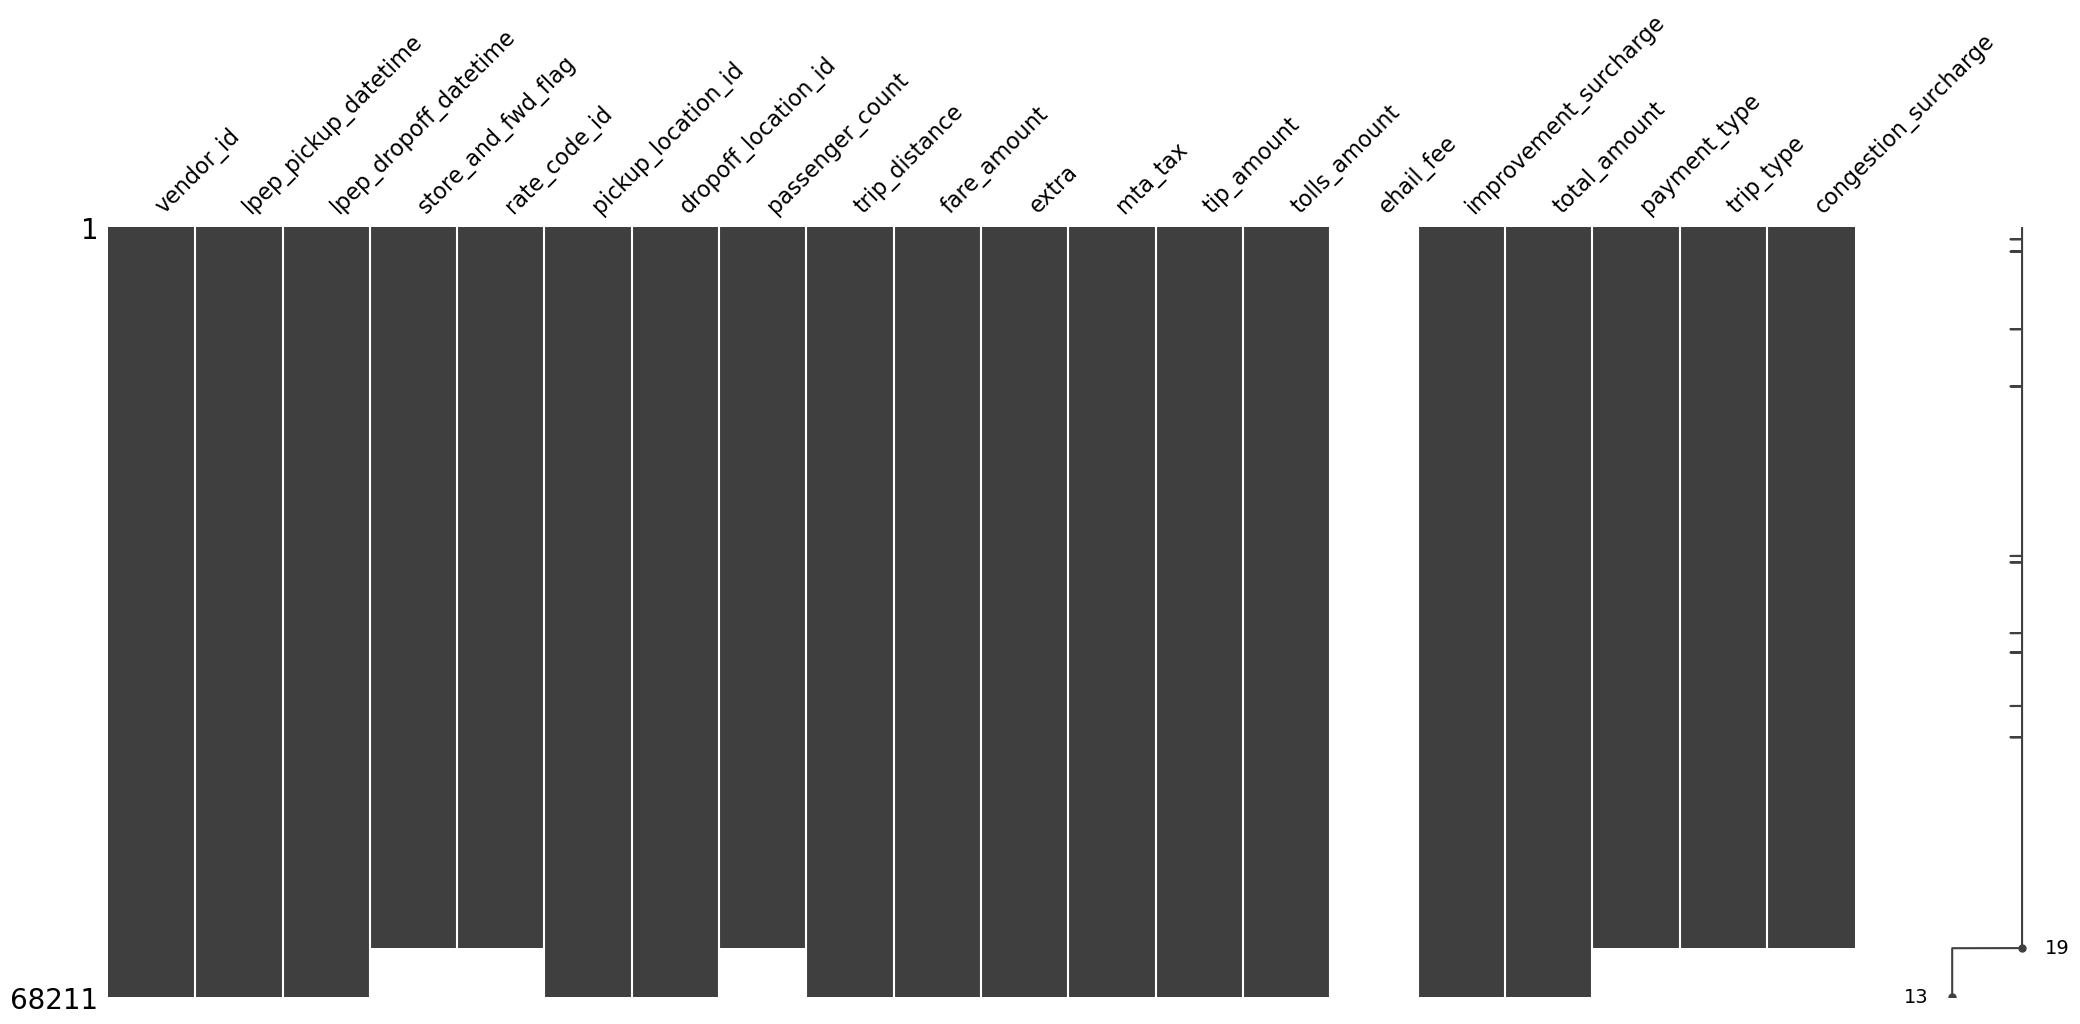

In [9]:
msno.matrix(df)
plt.show()

Based on the matrix, we found that there are several columns having missing values, such as store_and_fwd_flag, rate_code_id, and trip_type. The next step is to check the percentage of missing values in each column.

In [10]:
df_missing = pd.DataFrame(df.isnull().sum(), columns=["Missing Value Counts"])
df_missing["Percentage (%)"] = (df_missing["Missing Value Counts"] / len(df)) * 100
df_missing["Type"] = df.dtypes
df_missing[df_missing["Percentage (%)"]!=0]

,Missing Value Counts,Percentage (%),Type
store_and_fwd_flag,4324,6.339154,object
rate_code_id,4324,6.339154,float64
passenger_count,4324,6.339154,float64
ehail_fee,68211,100.000000,float64
payment_type,4324,6.339154,float64
trip_type,4334,6.353814,float64
congestion_surcharge,4324,6.339154,float64


There are 7 columns those having missing values. Most of them have the percentage of 6.34%, except `ehail_fee` and `trip_type.` The `ehail_fee` is a missing completely at random (MCAR) column. It means that the missing values are not related to any other variables in the dataset. Because of that, we will drop this column.

In [11]:
df = df.drop(columns=["ehail_fee"])

The`store_and_fwd_flag`, `payment_type`, `passenger_count`, and `congestion_surcharge` columns are missing at random (MAR) columns. It means that the missing values are related to other variables in the dataset. We will check the normality of these columns to decide the which central of tendecy imputations are suitable. 

For categorical columns, we will impute the missing values with the mode. Although the `rate_code_id` is considered as the numerical value, but it is actually categorical value. This approach will be applied for `store_and_fwd_flag`, `rate_code_id`, and `payment_type`.

For numerical columns, if they are normal, then we will impute the missing values with the median. Otherwise, we will impute these missing values with the mean. This approach will be applied to `passenger_count` and `congestion_surcharge`.

In [12]:
categoricals = ["store_and_fwd_flag", "rate_code_id", "payment_type"]
for column in categoricals:
    df[column] = df[column].fillna(df[column].mode()[0])

After filling these categorical values with mode, we will see the distribution for the numerical columns.

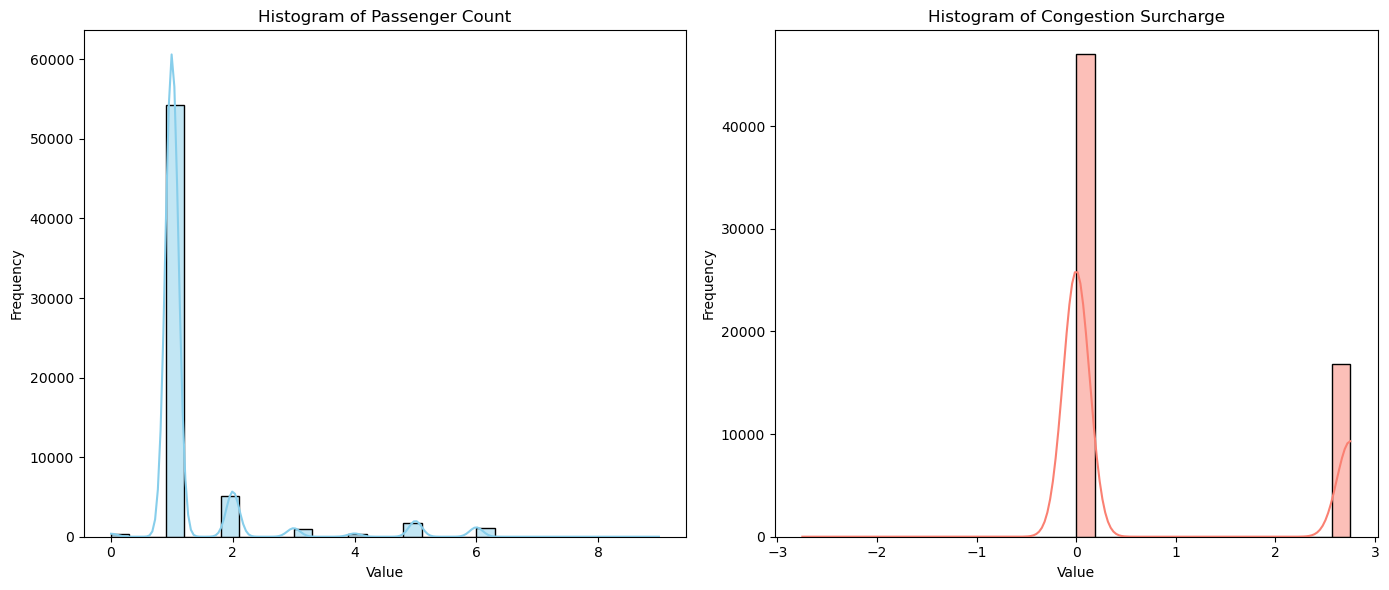

In [13]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the first histogram
sns.histplot(df["passenger_count"], bins=30, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Histogram of Passenger Count")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

# Plot the second histogram
sns.histplot(df["congestion_surcharge"], bins=30, kde=True, color="salmon", ax=axes[1])
axes[1].set_title("Histogram of Congestion Surcharge")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

After seeing the histogram, we can conclude that the `passenger_count` and `congestion_surcharge` columns are not normally distributed. Let's deep dive the data to see the distribution of these columns.

In [14]:
df_describe = df[["passenger_count", "congestion_surcharge"]].describe().reset_index()
df_describe.loc[len(df_describe)] = ["skewness", df_describe["passenger_count"].skew(), df_describe["congestion_surcharge"].skew()]
df_describe.loc[len(df_describe)] = ["kurtosis", df_describe["passenger_count"].kurtosis(), df_describe["congestion_surcharge"].kurtosis()]
df_describe

,index,passenger_count,congestion_surcharge
0,count,63887.000000,63887.000000
1,mean,1.315870,0.726748
2,std,0.979054,1.212836
3,min,0.000000,-2.750000
4,25%,1.000000,0.000000
5,50%,1.000000,0.000000
6,75%,1.000000,2.750000
7,max,9.000000,2.750000
8,skewness,2.828427,2.828427
9,kurtosis,9.000000,9.000000


In [15]:
# Create The Function For Normality Test
def determine_normality(column_name, skewness, kurtosis):
    # Determine skewness classification
    if skewness < -1:
        skewness_classification = "left-skewed"
    elif skewness > 1:
        skewness_classification = "right-skewed"
    else:
        skewness_classification = "approximately symmetrical"

    # Determine kurtosis classification
    if kurtosis > 3:
        kurtosis_classification = "leptokurtic"
    elif kurtosis < 3:
        kurtosis_classification = "platykurtic"
    else:
        kurtosis_classification = "mesokurtic"

    # Determine normality classification
    if skewness_classification == "approximately symmetrical" and kurtosis_classification == "mesokurtic":
        normality_classification = "approximately normal"
    else:
        normality_classification = "non-normal"

    return dict(column_name = column_name, normality = normality_classification, skewness =  skewness_classification, kurtosis = kurtosis_classification)

In [16]:
dn = determine_normality("passenger_count", df_describe.iloc[8, 1], df_describe.iloc[8, 2])
dn

{'column_name': 'passenger_count',
 'normality': 'non-normal',
 'skewness': 'right-skewed',
 'kurtosis': 'platykurtic'}

In [17]:
dn = determine_normality("congestion_surcharge", df_describe.iloc[8, 1], df_describe.iloc[8, 2])
dn

{'column_name': 'congestion_surcharge',
 'normality': 'non-normal',
 'skewness': 'right-skewed',
 'kurtosis': 'platykurtic'}

Because of that, we will impute these numerical missing values with the median.

In [18]:
numericals = ["passenger_count", "congestion_surcharge"]
for column in numericals:
    df[column] = df[column].fillna(df[column].median())

Although the difference is only 0.01% among of the most columns, the `store_and_fwd_flag` column is a missing not at random (MNAR) column. This column is considered as categorical values, so we will impute the missing values with the mode imputation.

In [19]:
df["trip_type"] = df["trip_type"].fillna(df["trip_type"].mode()[0])

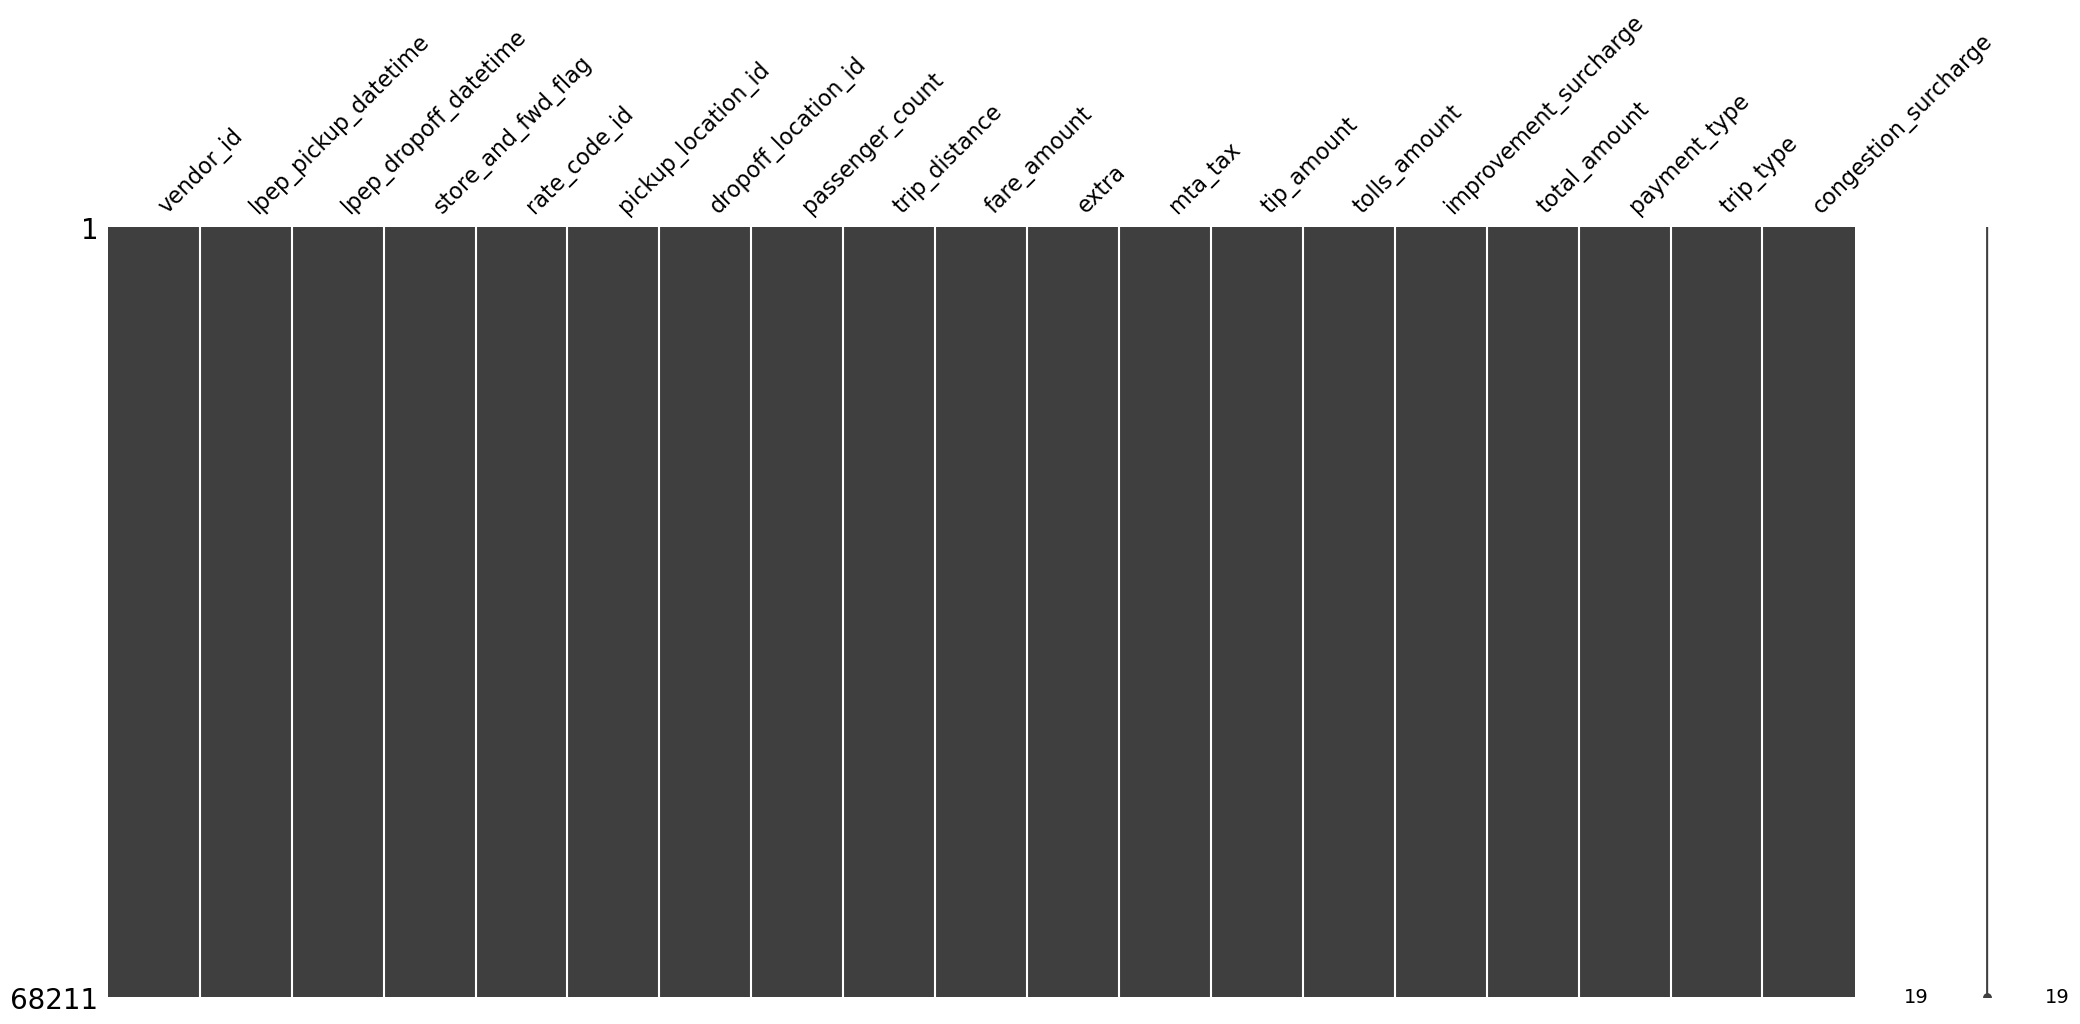

In [20]:
msno.matrix(df)
plt.show()

### Enrich

In [76]:
# Convert datetime columns to datetime type
for column in ["lpep_pickup_datetime", "lpep_dropoff_datetime"]:
    df[column] = pd.to_datetime(df[column])

In [77]:
# Convert categorical columns to category type
for column in ["vendor_id", "store_and_fwd_flag", "rate_code_id", "payment_type", "trip_type", "pickup_location_id", "dropoff_location_id"]:
    df[column] = df[column].astype("category")

In [78]:
# Calculate trip duration in minutes
df["trip_duration"] = round((df["lpep_dropoff_datetime"] - df["lpep_pickup_datetime"]).dt.total_seconds() / 60, 2)

In [79]:
# Extract hour, day of week, and month from pickup datetime
df["pickup_hour"] = df["lpep_pickup_datetime"].dt.hour
df["pickup_day_of_week"] = df["lpep_pickup_datetime"].dt.dayofweek
df["pickup_month"] = df["lpep_pickup_datetime"].dt.month

In [80]:
# Map vendor_id to vendor_name
vendor_mapping = {
    1: "Creative Mobile Technologies, LLC.",
    2: "VeriFone Inc."
}
df["vendor_name"] = df["vendor_id"].map(vendor_mapping)

In [81]:
# Map rate_code_id to rate_code_name
rate_code_mapping = {
    1: "Standard Rate",
    2: "JFK",
    3: "Newark",
    4: "Nassau or Westchester",
    5: "Negotiated Fare",
    6: "Group Ride",
    99: "Unknown"
}
df["rate_code_name"] = df["rate_code_id"].map(rate_code_mapping)

In [82]:
# Map store_and_fwd_flag to store_and_fwd_flag
store_and_fwd_mapping = {
    "Y": "Store and Forward Trip",
    "N": "Not A Store and Forward Trip",
}
df["store_and_fwd_flag_name"] = df["store_and_fwd_flag"].map(store_and_fwd_mapping)

In [83]:
# Map payment_type to payment_type_name
payment_type_mapping = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided Trip"
}
df["payment_type_name"] = df["payment_type"].map(payment_type_mapping)

In [84]:
# Map trip_type to trip_type_name
trip_type_mapping = {
    1: "Street-hail",
    2: "Dispatch"
}
df["trip_type_name"] = df["trip_type"].map(trip_type_mapping)

In [85]:
df.head()

,vendor_id,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_code_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration,pickup_hour,pickup_day_of_week,pickup_month,vendor_name,rate_code_name,store_and_fwd_flag_name,payment_type_name,trip_type_name
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.00,166,143,1.00,2.58,14.90,1.00,0.50,4.03,0.00,1.00,24.18,1.00,1.00,2.75,11.02,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.00,24,43,1.00,1.81,10.70,1.00,0.50,2.64,0.00,1.00,15.84,1.00,1.00,0.00,6.77,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.00,223,179,1.00,0.00,7.20,1.00,0.50,1.94,0.00,1.00,11.64,1.00,1.00,0.00,6.33,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.00,41,238,1.00,1.30,6.50,0.50,1.50,1.70,0.00,1.00,10.20,1.00,1.00,0.00,5.82,0,6,1,"Creative Mobile Technologies, LLC.",Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.00,41,74,1.00,1.10,6.00,0.50,1.50,0.00,0.00,1.00,8.00,1.00,1.00,0.00,5.97,0,6,1,"Creative Mobile Technologies, LLC.",Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail


### Validate

In [86]:
# Convert rate_code_id and passenger_count from float to integer
for column in ["rate_code_id", "passenger_count"]:
    df[column] = df[column].apply(lambda x: int(x))

In [87]:
df.head()

,vendor_id,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_code_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration,pickup_hour,pickup_day_of_week,pickup_month,vendor_name,rate_code_name,store_and_fwd_flag_name,payment_type_name,trip_type_name
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1,2.58,14.90,1.00,0.50,4.03,0.00,1.00,24.18,1.00,1.00,2.75,11.02,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1,1.81,10.70,1.00,0.50,2.64,0.00,1.00,15.84,1.00,1.00,0.00,6.77,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1,223,179,1,0.00,7.20,1.00,0.50,1.94,0.00,1.00,11.64,1.00,1.00,0.00,6.33,0,6,1,VeriFone Inc.,Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1,1.30,6.50,0.50,1.50,1.70,0.00,1.00,10.20,1.00,1.00,0.00,5.82,0,6,1,"Creative Mobile Technologies, LLC.",Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1,1.10,6.00,0.50,1.50,0.00,0.00,1.00,8.00,1.00,1.00,0.00,5.97,0,6,1,"Creative Mobile Technologies, LLC.",Standard Rate,Not A Store and Forward Trip,Credit Card,Street-hail


In [88]:
# Sort the DataFrame by lpep_pickup_datetime
df = df.sort_values(by="lpep_pickup_datetime", ascending=True)

In [89]:
# Save the cleaned DataFrame to a CSV file
df.to_csv("NYC TLC Trip Record - Clean.csv", index=False, sep = ";")

## Exploratory Data Analysis (EDA)